## Example to load the network, sample 4 levels at random from the latent space and then plot them using matplotlib.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
#!cp 'path/to/file' 'path/to/drive'

In [ ]:
#import os
#os.chdir("drive/My Drive/exercise_DL_pcg")

In [ ]:
#!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     Untitled.ipynb
models				   requirements.txt  vae_mario.py
plotting_utilities.py		   sprites


In [3]:
import os
import torch
import matplotlib.pyplot as plt

from lab6.vae_mario import VAEMario
from lab6.plotting_utilities import plot_decoded_level

In [5]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"lab6/models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [6]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))

In [7]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


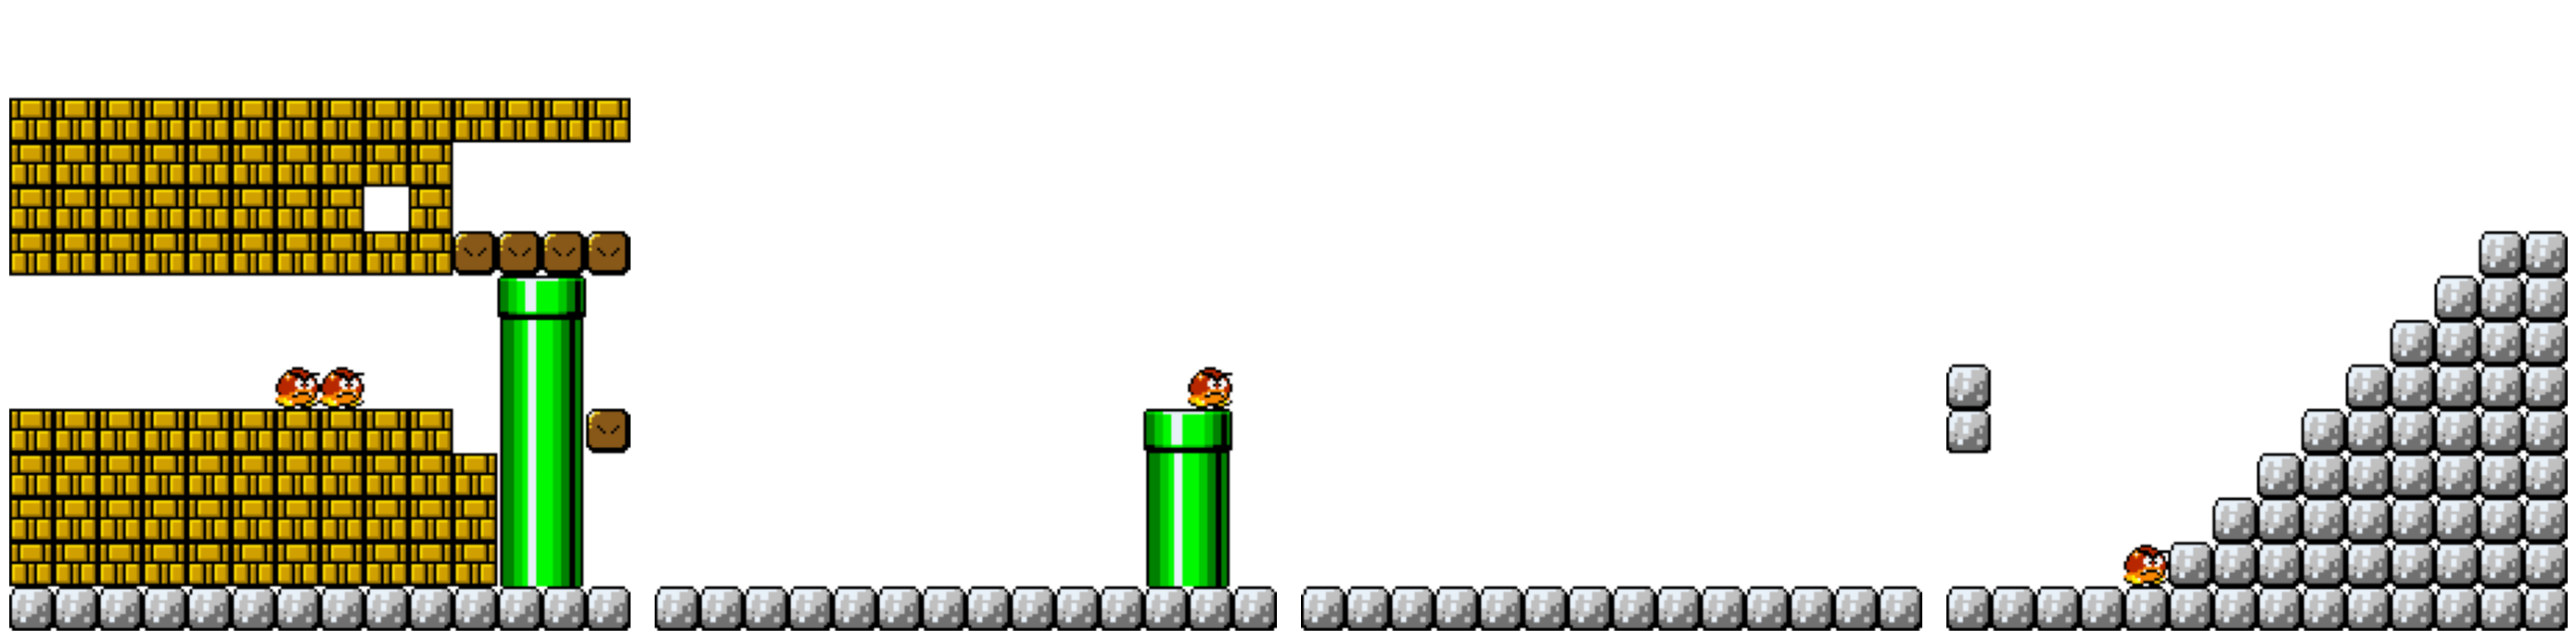

In [8]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)

In [9]:
# Imports
import os
import torch
import matplotlib.pyplot as plt
import lab6.train_vae as train_vae

from lab6.vae_mario import VAEMario
from lab6.plotting_utilities import plot_decoded_level

In [10]:
# Load model
model_name = "mario_vae_zdim_2_final"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"lab6/models/{model_name}.pt"))

VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

index:  3  has most stones


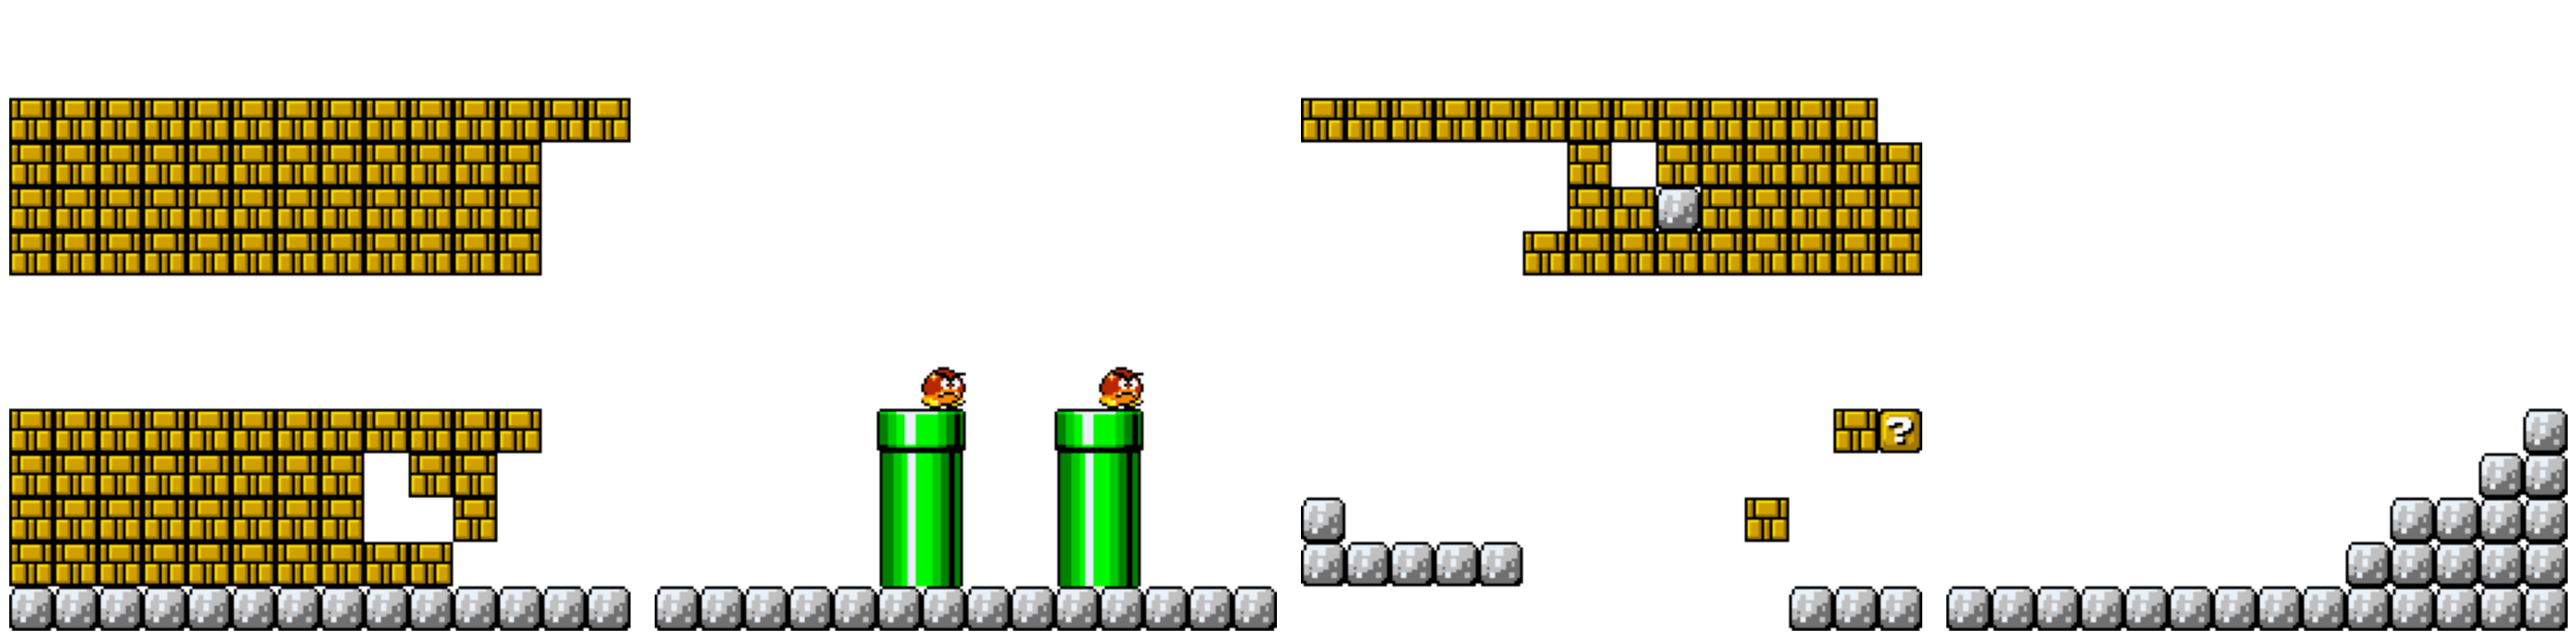

'\n_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))\nfor level_img, ax in zip(level_imgs, axes):\n    ax.imshow(level_img)\n    ax.axis("off")\n\nplt.tight_layout()\nplt.show()\n'

In [11]:
# Sampling and searching the latent space:
from lab6.plotting_utilities import get_img_from_level
from lab6.plotting_utilities import encoding as tile_encoding
import cv2

zs = 2.5 * torch.randn((4, z_dim))
levels = vae.decode(zs)

level_imgs = [plot_decoded_level(level) for level in levels]

levels_ascii = []

for lvl in levels:
    levels_ascii.append(torch.argmax(lvl, dim=0).detach().numpy())

max_stone_tiles = -1
most_stones_index = -1

# Most stone tiles:
for l in range(len(levels_ascii)):
    lvl = levels_ascii[l]
    stone_tiles = 0
    for i in range(lvl.shape[0]):
        for j in range(lvl.shape[1]):
            # Slightly hacky
            if lvl[i][j] == 0:
                stone_tiles += 1

    if stone_tiles > max_stone_tiles:
        max_stone_tiles = stone_tiles
        most_stones_index = l

print("index: ", most_stones_index, " has most stones")

_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))

for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()